# Solutions Analyse Fréquentielle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import math
import RegulScipy3 as rs

1. $\quad H(s) = \dfrac{1}{10s+1}$

En remplaçant $s=j\omega$, la fonction de transfert devient:

$$ \quad H(j\omega) = \dfrac{1}{10j\omega + 1} $$

Commençons par multiplier et diviser par le binôme conjugué:

\begin{align}
  \quad H(j\omega) &= \dfrac{1}{10j\omega + 1} \\
  &= \dfrac{1}{10j\omega + 1} \dfrac{-10j\omega + 1}{-10j\omega + 1} \\
  &= \dfrac{-10j\omega + 1}{100\omega^2 + 1} \\
  &= \dfrac{1}{100\omega^2 + 1} - \dfrac{10j\omega}{100\omega^2 + 1}
\end{align}

Le premier terme est notre nombre réel et le second notre nombre imaginaire.

Déterminons l'expression du gain:

\begin{align}
  G(\omega) &= \sqrt{\left( \dfrac{1}{100\omega^2 + 1} \right)^2 + \left( \dfrac{10\omega}{100\omega^2 + 1} \right)^2} \\
  &= \dfrac{1}{100\omega^2 + 1} \sqrt{1 + 100\omega^2}
\end{align}

Déterminons l'expression de la phase:

\begin{align}
  \Phi(\omega) &= \arctan{\left( \dfrac{-\dfrac{10\omega}{100\omega^2 + 1}}{\dfrac{1}{100\omega^2 + 1}} \right)} \\
  &= \arctan{-10\omega}
\end{align}

Lorsque $\omega \ll \frac{1}{10}$, les termes en $\omega$ sont négligeables et les expressions deviennent:

\begin{align}
  G(\omega) &= \dfrac{1}{1} \sqrt{1} = 1\, \rightarrow\, G_{dB} = 20 \log_{10} 1 = 0\, \mathrm{dB} \\
  \Phi(\omega) &= \lim_{\omega \rightarrow 0} \arctan -10 \omega = 0\,^\circ
\end{align}

Lorsque $\omega \gg \frac{1}{10}$, les termes en $\omega$ sont prépondérants et les expressions deviennent:

\begin{align}
  G(\omega) &= \dfrac{1}{100\omega^2} \sqrt{100\omega^2} = \dfrac{1}{10\omega}\, \rightarrow\, G_{dB} = -20\log_{10} 10 - 20 \log_{10} \omega \\
  \Phi(\omega) &= \lim_{\omega \rightarrow +\infty} \arctan -10\omega = -90\,^\circ
\end{align}

Les diagrammes de Bode sont donnés ci-dessous:

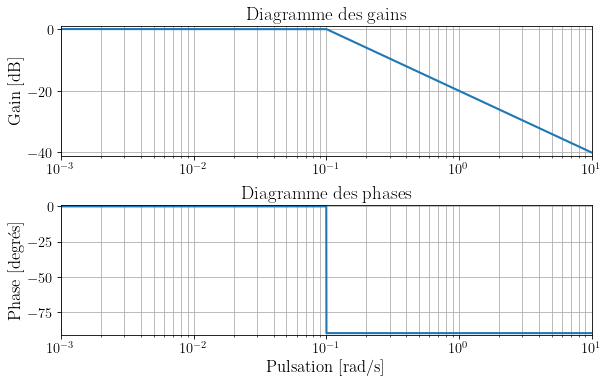

In [2]:
H = rs.LinSys([1], [10, 1])

w, mag, phase = rs.bodeasympt(H)

---

2. $\quad H(s) = \dfrac{1}{100s}$

En remplaçant $s=j\omega$, la fonction de transfert devient:

$$ \quad H(j\omega) = \dfrac{1}{100j\omega} $$

Commençons par multiplier et diviser par le binôme conjugué:

\begin{align}
  \quad H(j\omega) &= \dfrac{1}{100j\omega} \\
  &= \dfrac{1}{100j\omega} \dfrac{-100j\omega}{-100j\omega} \\
  &= \dfrac{-100j\omega}{10000\omega^2} \\
  &= \dfrac{-j}{100\omega}
\end{align}

Déterminons l'expression du gain:

\begin{align}
  G(\omega) &= \sqrt{ \left( \dfrac{-1}{100\omega} \right)^2 } \\
  &= \dfrac{1}{100\omega}
\end{align}

Déterminons l'expression de la phase:

\begin{align}
  \Phi(\omega) &= \arctan{\left( \dfrac{-\dfrac{1}{100\omega}}{0} \right)} \\
  &= \arctan{-\infty} \\
  &= -90\, ^\circ
\end{align}

Le pôle étant $s = 0$, $\omega$ ne peut pas être plus petit que le pôle car les fréquences négatives n'existent pas. Ce cas-là ne doit donc pas être traité.

Lorsque $\omega \gg 0$, les expressions deviennent:

\begin{align}
  G(\omega) &= \dfrac{1}{100\omega}\, \rightarrow\, G_{dB} = -20\log_{10} 100 - 20 \log_{10} \omega \\
  \Phi(\omega) &= -90\,^\circ
\end{align}

Les diagrammes de Bode sont donnés ci-dessous:

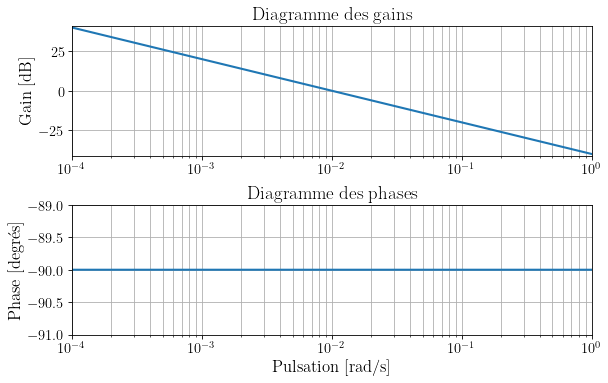

In [3]:
H = rs.LinSys([1], [100, 0])

w, mag, phase = rs.bodeasympt(H)

---

3. $\quad H(s) = \dfrac{10(s+1)}{(s+10)(10s+0.1)}$

Commençons par mettre la fonction de transfert sous la forme de Bode:

\begin{align}
  H(s) &= \dfrac{10(s+1)}{10(0.1s+1)0.1(100s+1)} \\
  &= \dfrac{10(s+1)}{(0.1s+1)(100s+1)}
\end{align}

En remplaçant $s=j\omega$, l'expression devient:

$$ H(j\omega) = \dfrac{10(j\omega+1)}{(0.1j\omega+1)(100j\omega+1)} $$

L'expression possède 4 éléments:
- $H_1(j\omega) = 10$
- $H_2(j\omega) = j\omega + 1$
- $H_3(j\omega) = 0.1j\omega + 1$
- $H_4(j\omega) = 100j\omega + 1$

Les éléments $H_3(j\omega)$ et $H_4(j\omega)$ étant au dénominateur, leur contribution sera négative.

D'après les exercices précédents, il est facile de déduire les asymptotes de chaque élément indépendamment:

- $H_1(j\omega)$: Gain indépendant de $\omega$

\begin{align}
  G_1(\omega) &= 20 \log_{10} 10 = 20\, \mathrm{dB} \\
  \Phi_1(\omega) &= 0\, ^\circ
\end{align}

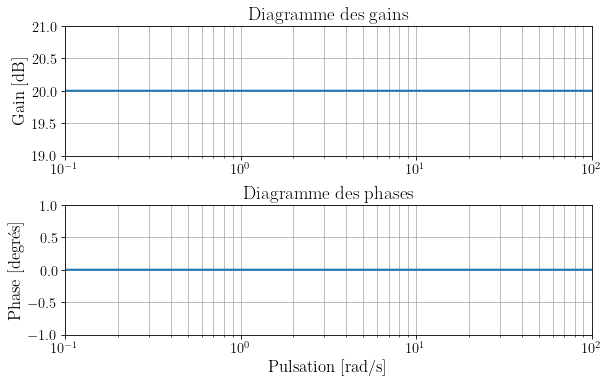

In [4]:
H_1 = rs.LinSys([10], [1])
w, mag1, phase1 = rs.bodeasympt(H_1) 

- $H_2(j\omega)$:

\begin{align}
  & \omega \ll 1 \, \left\{ \begin{array}{l}
    G_2(\omega) = 1\, \rightarrow\, G_{2dB} = 20 \log_{10} 1 = 0\, \mathrm{dB} \\
    \Phi_2(\omega) = \lim_{\omega \rightarrow 0} \arctan \omega = 0\,^\circ
  \end{array} \right. \\
  & \omega \gg 1 \, \left\{ \begin{array}{l}
    G_2(\omega) = \omega\, \rightarrow\, G_{2dB} = 20 \log_{10} \omega \\
    \Phi_2(\omega) = \lim_{\omega \rightarrow +\infty} \arctan \omega = 90\,^\circ
  \end{array} \right.
\end{align}

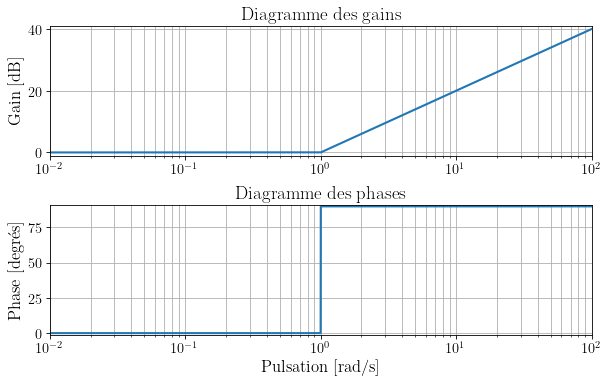

In [5]:
H_2 = rs.LinSys([1, 1], [1])
w, mag2, phase2 = rs.bodeasympt(H_2) 

- $H_3(j\omega)$:

\begin{align}
  & \omega \ll 10 \, \left\{ \begin{array}{l}
    G_3(\omega) = 1\, \rightarrow\, G_{3dB} = 20 \log_{10} 1 = 0\, \mathrm{dB} \\
    \Phi_3(\omega) = \lim_{\omega \rightarrow 0} \arctan \omega = 0\,^\circ
  \end{array} \right. \\
  & \omega \gg 10 \, \left\{ \begin{array}{l}
    G_3(\omega) = 0.1\omega\, \rightarrow\, G_{3dB} = 20 \log_{10} 0.1 + 20 \log_{10} \omega \\
    \Phi_3(\omega) = \lim_{\omega \rightarrow +\infty} \arctan 0.1\omega = 90\,^\circ
  \end{array} \right.
\end{align}

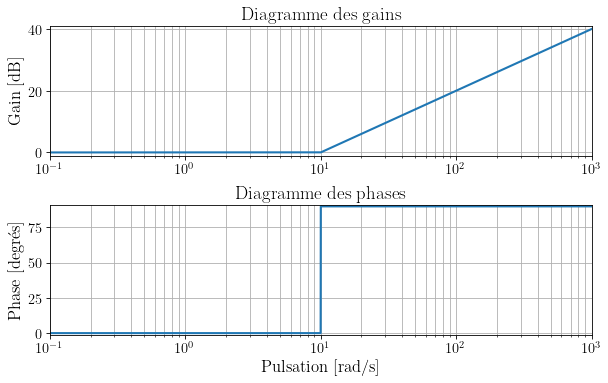

In [6]:
H_3 = rs.LinSys([0.1, 1], [1])
w, mag3, phase3 = rs.bodeasympt(H_3) 

- $H_4(j\omega)$:

\begin{align}
  & \omega \ll 0.01 \, \left\{ \begin{array}{l}
    G_4(\omega) = 1\, \rightarrow\, G_{4dB} = 20 \log_{10} 1 = 0\, \mathrm{dB} \\
    \Phi_4(\omega) = \lim_{\omega \rightarrow 0} \arctan \omega = 0\,^\circ
  \end{array} \right. \\
  & \omega \gg 0.01 \, \left\{ \begin{array}{l}
    G_4(\omega) = 100\omega\, \rightarrow\, G_{4dB} = 20 \log_{10} 100 + 20 \log_{10} \omega \\
    \Phi_4(\omega) = \lim_{\omega \rightarrow +\infty} \arctan 100\omega = 90\,^\circ
  \end{array} \right.
\end{align}

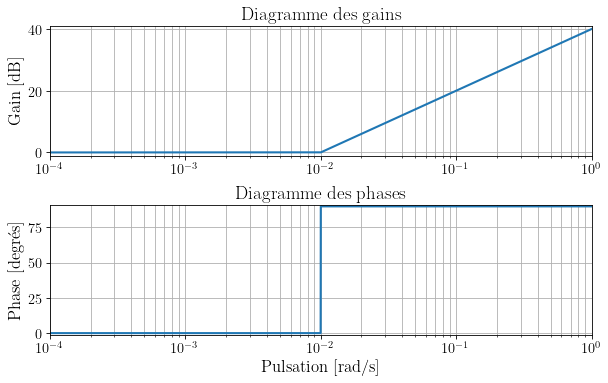

In [7]:
H_4 = rs.LinSys([100, 1], [1])
w, mag4, phase4 = rs.bodeasympt(H_4) 

Les diagrammes de Bode de $H(j\omega)$ sont obtenus en sommant les diagrammes de toutes les contributions ensembles, en tenant compte du signe:

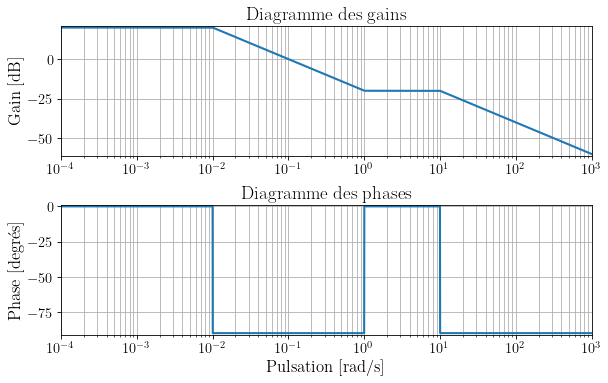

In [8]:
H = rs.LinSys([10, 10], [10, 100.1, 1])
w, mag, phase = rs.bodeasympt(H)

---

4. $\quad H(s) = 10\,e^{100s}$

En remplaçant $s=j\omega$, la fonction de transfert devient:

$$ H(j\omega) = 10\, e^{100j\omega} $$

La fonction de transfert est déjà sous forme exponentielle. Les gain et phase sont donnés par les expressions suivantes:

\begin{align}
  G(\omega) &= 10\, \rightarrow\, G_{dB} = 20 \log_{10} 10 = 20\, \mathrm{dB} \\
  \Phi(\omega) &= 100\omega
\end{align}

Les diagrammes de Bode sont donnés ci-dessous:

In [9]:
p_min = -1
p_max = 5

n = 10001

w = [10 ** (p_min + (p_max - p_min) * i / n) for i in range(n)]

mag = [20 for _ in w]
phase = [100 * w_i for w_i in w]

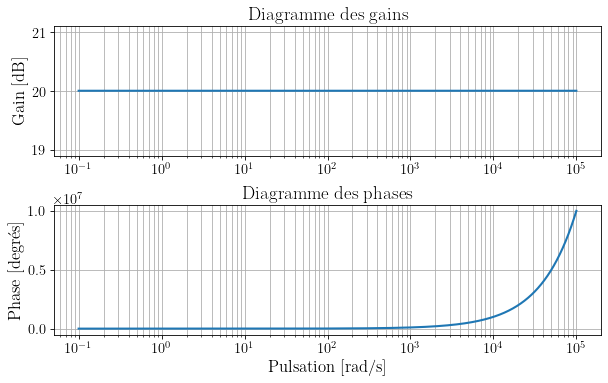

In [10]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].semilogx(w, mag)
axs[1].semilogx(w, phase)
axs[0].set_title('Diagramme des gains')
axs[1].set_title('Diagramme des phases')
axs[0].set_ylabel('Gain [dB]')
axs[1].set_ylabel('Phase [degrés]')
axs[1].set_xlabel('Pulsation [rad/s]')
axs[0].grid(True, which='both')
axs[1].grid(True, which='both')